In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
sellers = pd.read_csv("../data/raw/olist_sellers_dataset.csv")
order = pd.read_csv("../data/raw/olist_orders_dataset.csv")
product = pd.read_csv("../data/raw/olist_products_dataset.csv")
payment = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
review = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
customer = pd.read_csv("../data/raw/olist_customers_dataset.csv")
category = pd.read_csv("../data/raw/product_category_name_translation.csv")
geolocation = pd.read_csv("../data/raw/olist_geolocation_dataset.csv")

In [3]:
# -------------------- Merge --------------------
dataframe = customer.merge(order, on='customer_id')
dataframe = dataframe.merge(review, on='order_id')
dataframe = dataframe.merge(payment, on='order_id', validate='m:m')
dataframe = dataframe.merge(item, on='order_id')
dataframe = dataframe.merge(product, on='product_id')
dataframe= dataframe.merge(category, on='product_category_name', how='left')

In [4]:
df = dataframe.copy()


In [5]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,credit_card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [6]:
df.shape

(117329, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_approved_at              117314 non-null  object 
 9   order_delivered_carrier_date   116094 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  117329 non-null  object 
 12  review_id                     

In [8]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [9]:
df.duplicated().sum()

0

In [10]:
unique_values = []
for i in df.columns[0:37].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    unique_values.append(len(df[i].astype(str).value_counts()))

customer_id : 97916
customer_unique_id : 94720
customer_zip_code_prefix : 14955
customer_city : 4108
customer_state : 27
order_id : 97916
order_status : 7
order_purchase_timestamp : 97370
order_approved_at : 89534
order_delivered_carrier_date : 80450
order_delivered_customer_date : 95022
order_estimated_delivery_date : 449
review_id : 97708
review_score : 5
review_comment_title : 4498
review_comment_message : 35692
review_creation_date : 632
review_answer_timestamp : 97546
payment_sequential : 29
payment_type : 4
payment_installments : 24
payment_value : 28831
order_item_id : 21
product_id : 32789
seller_id : 3090
shipping_limit_date : 92642
price : 5948
freight_value : 6976
product_category_name : 74
product_name_lenght : 67
product_description_lenght : 2959
product_photos_qty : 20
product_weight_g : 2201
product_length_cm : 100
product_height_cm : 103
product_width_cm : 96
product_category_name_english : 72


In [11]:
df.describe()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000
mean,35060.118112,4.031467,1.094452,2.940151,172.062565,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452
std,29849.496175,1.387927,0.731174,2.775370,265.388194,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875
min,1003.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,4.000000,1.000000,1.000000,60.750000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24240.000000,5.000000,1.000000,2.000000,108.100000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58770.000000,5.000000,1.000000,4.000000,189.060000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,5.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [12]:
#Quantidade por Cidade
df.groupby(['customer_city']).size().sort_values(ascending=False).head(25)

customer_city
sao paulo                18582
rio de janeiro            8158
belo horizonte            3252
brasilia                  2466
curitiba                  1807
campinas                  1723
porto alegre              1658
salvador                  1507
guarulhos                 1386
sao bernardo do campo     1119
niteroi                   1054
santo andre                913
osasco                     893
goiania                    839
santos                     834
sao jose dos campos        821
fortaleza                  756
sorocaba                   728
recife                     702
jundiai                    684
florianopolis              677
ribeirao preto             605
contagem                   515
nova iguacu                515
belem                      512
dtype: int64

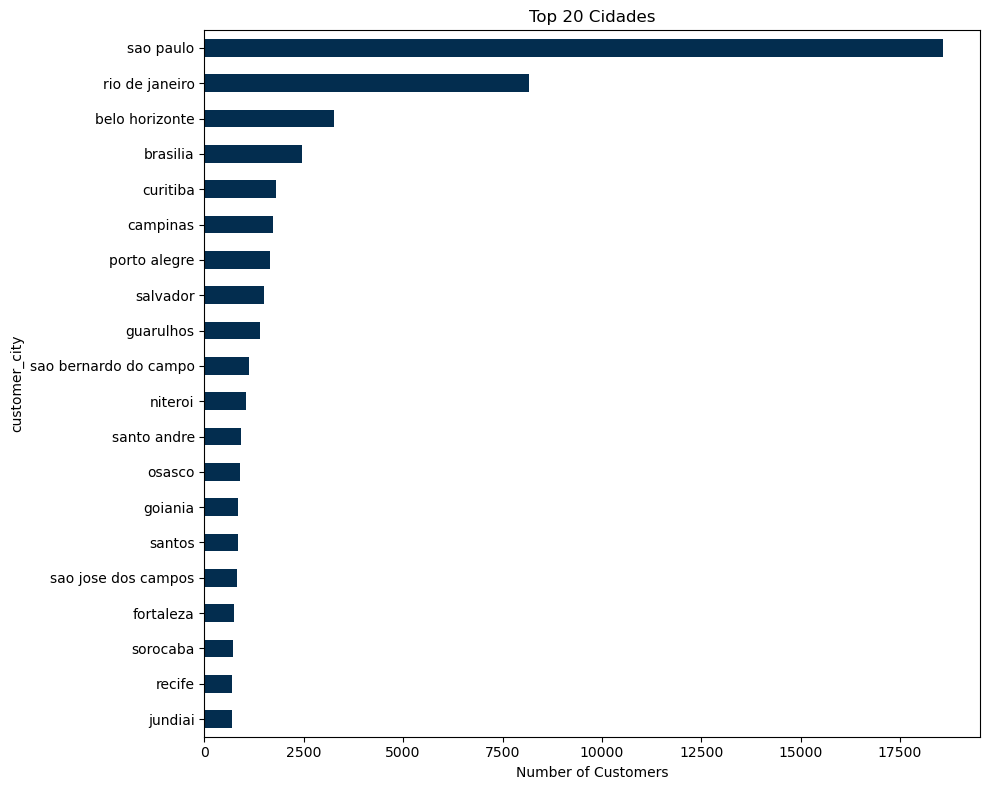

In [13]:
plt.figure(figsize=(10, 8))
df.customer_city.value_counts().head(20).sort_values().plot(kind='barh', color='#032d4f')
plt.title("Top 20 Cidades")
plt.xlabel("Number of Customers")
plt.tight_layout()
plt.show()

In [14]:
#Quantidade por Estado
df.groupby(['customer_state']).size().sort_values(ascending=False)

customer_state
SP    49527
RJ    15220
MG    13616
RS     6516
PR     5959
SC     4283
BA     4014
DF     2482
GO     2416
ES     2319
PE     1876
CE     1545
MT     1117
PA     1102
MS      854
MA      843
PB      629
PI      568
RN      566
AL      459
SE      395
TO      338
RO      285
AM      170
AC       95
AP       83
RR       52
dtype: int64

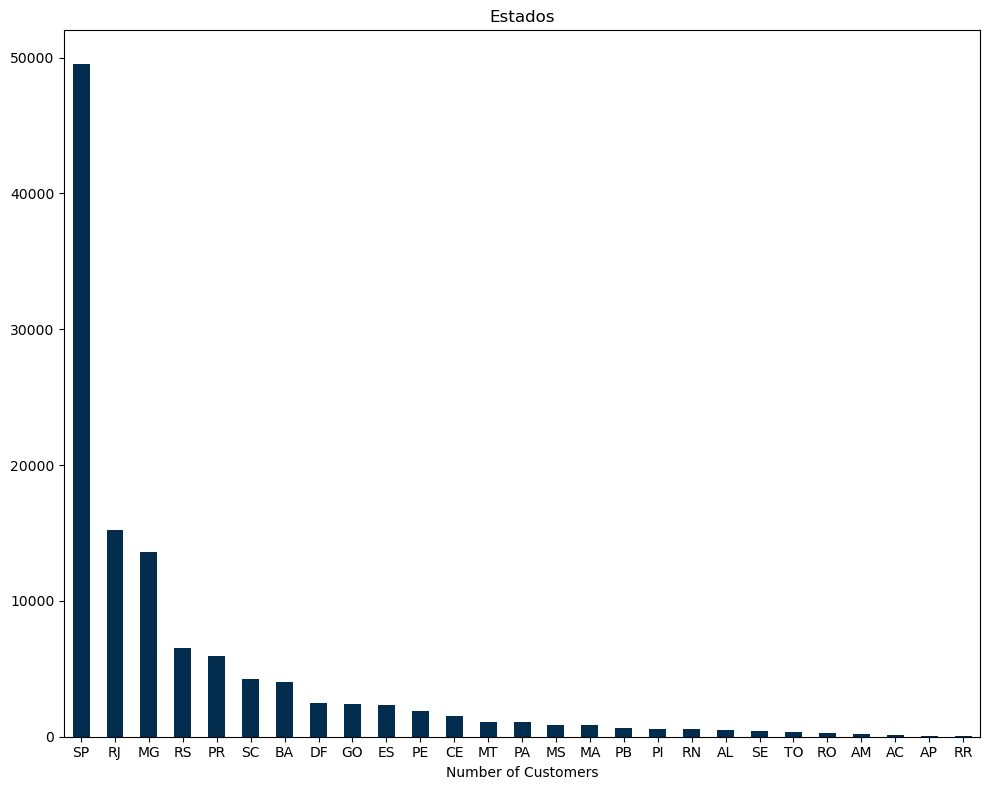

In [39]:
plt.figure(figsize=(10, 8))
df.customer_state.value_counts().plot(kind='bar', color='#032d4f')
plt.title("Estados")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
df.groupby(['order_status']).size().sort_values(ascending=False).head(25)

order_status
delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
dtype: int64

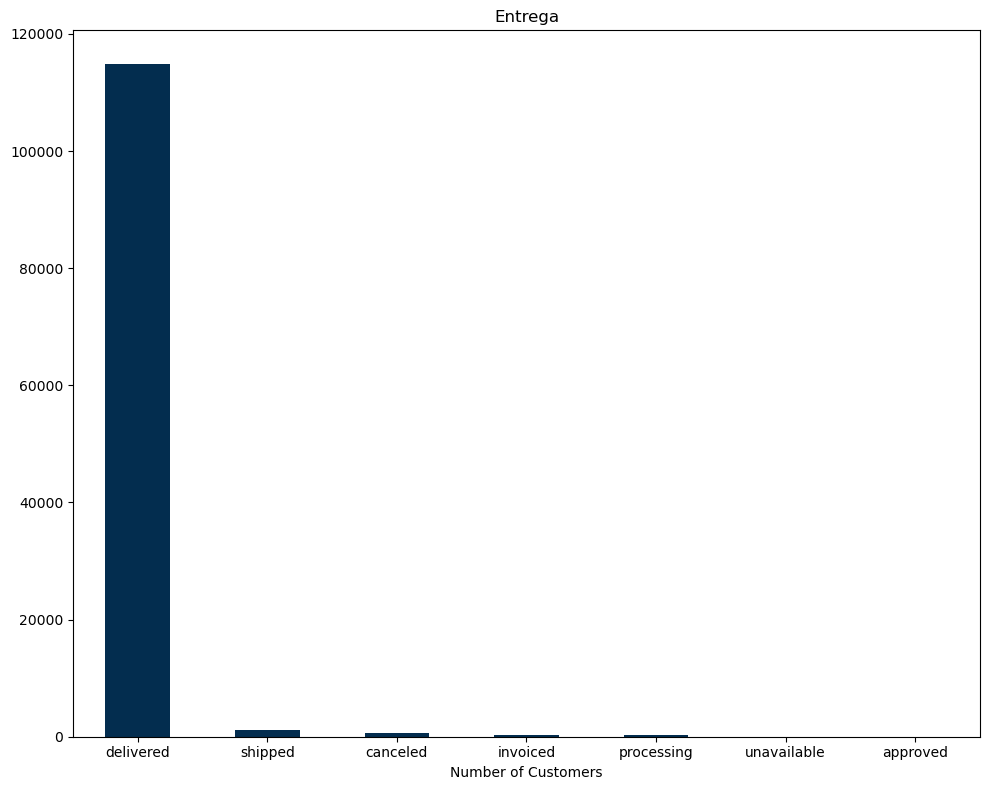

In [40]:
plt.figure(figsize=(10, 8))
df.order_status.value_counts().plot(kind='bar', color='#032d4f')
plt.title("Entrega")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
df.groupby(['review_score']).size().sort_values(ascending=False).head(25)

review_score
5    66264
4    22286
1    14854
3     9840
2     4085
dtype: int64

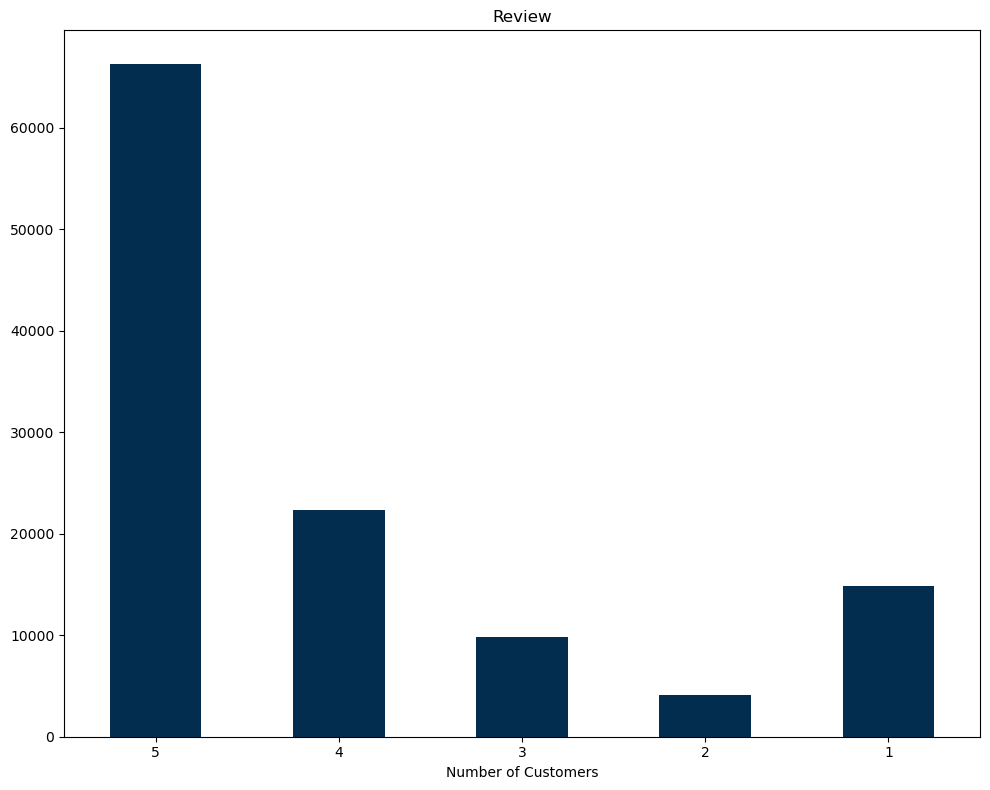

In [42]:
plt.figure(figsize=(10, 8))
df.review_score.value_counts().sort_index(ascending=False).plot(kind='bar', color='#032d4f')
plt.title("Review")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
df.groupby(['payment_sequential']).size().sort_values(ascending=False).head(25)

payment_sequential
1     112281
2       3359
3        646
4        315
5        189
6        132
7         91
8         60
9         49
10        41
11        36
12        28
13        16
14        13
15        11
16         9
17         9
18         9
19         9
20         6
21         6
22         3
23         2
24         2
25         2
dtype: int64

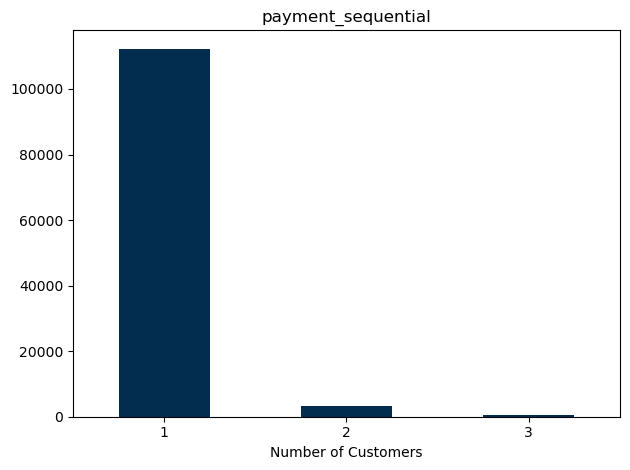

In [43]:
#plt.figure(figsize=(10, 7))
df.payment_sequential.value_counts().head(3).plot(kind='bar', color='#032d4f')
plt.title("payment_sequential")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
df.groupby(['payment_type']).size().sort_values(ascending=False).head(25)

payment_type
credit_card    86520
boleto         22835
voucher         6282
debit_card      1692
dtype: int64

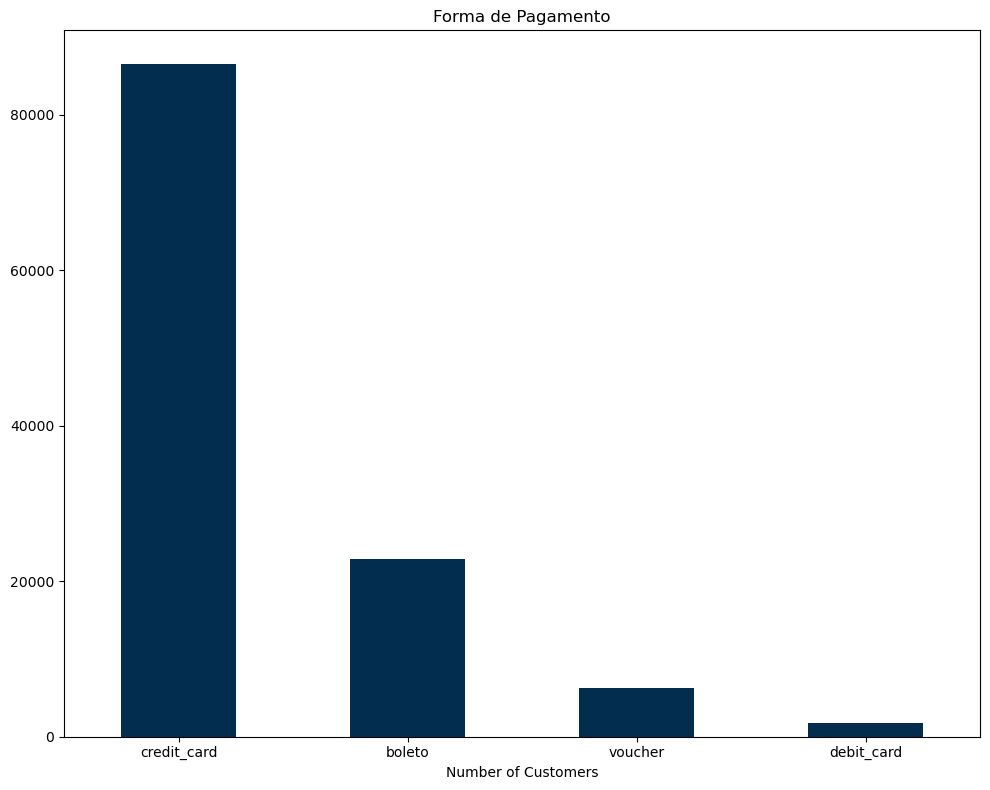

In [44]:
plt.figure(figsize=(10, 8))
df.payment_type.value_counts().sort_values(ascending=False).plot(kind='bar', color='#032d4f')
plt.title("Forma de Pagamento")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
df.groupby(['payment_installments']).size().sort_values(ascending=False).head(25)

payment_installments
1     58507
2     13656
3     11728
4      7951
10     6841
5      6003
8      5066
6      4611
7      1821
9       716
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
16        7
17        7
21        6
0         3
22        1
23        1
dtype: int64

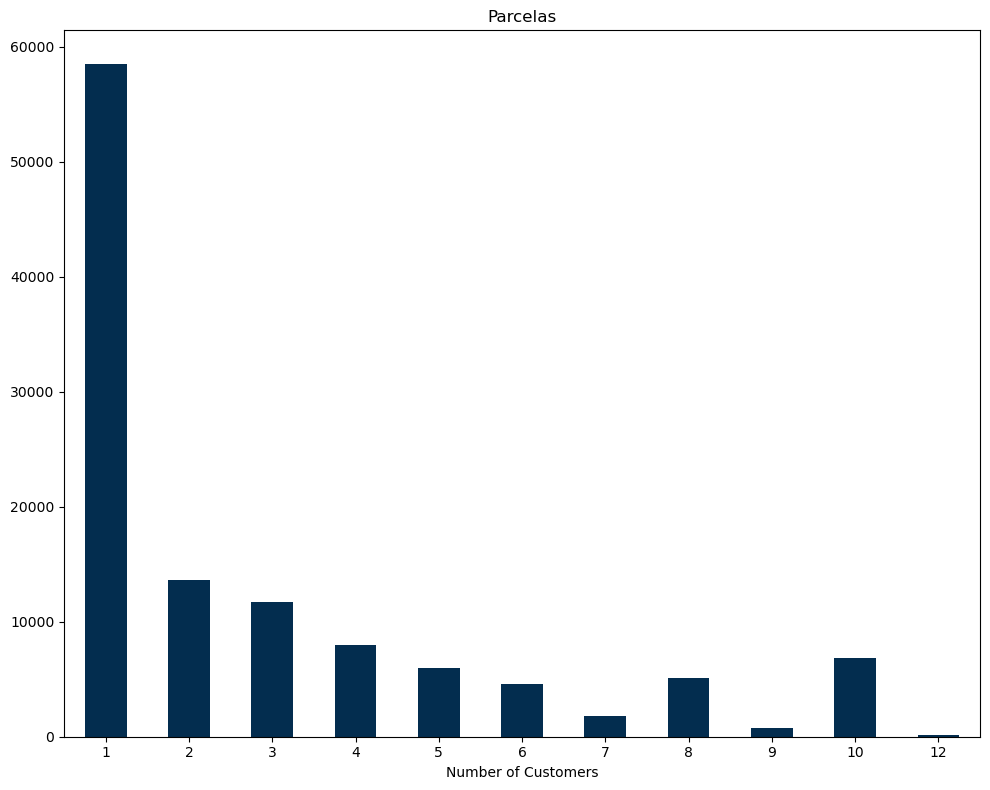

In [49]:
plt.figure(figsize=(10, 8))
df.payment_installments.value_counts().head(11).sort_index(ascending=True).plot(kind='bar', color='#032d4f')
plt.title("Parcelas")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
df.groupby(['product_category_name']).size().sort_values(ascending=False).head(25)

product_category_name
cama_mesa_banho                      11847
beleza_saude                          9944
esporte_lazer                         8942
moveis_decoracao                      8743
informatica_acessorios                8105
utilidades_domesticas                 7331
relogios_presentes                    6161
telefonia                             4692
ferramentas_jardim                    4558
automotivo                            4356
brinquedos                            4246
cool_stuff                            3964
perfumaria                            3575
bebes                                 3178
eletronicos                           2827
papelaria                             2607
fashion_bolsas_e_acessorios           2159
pet_shop                              2020
moveis_escritorio                     1773
consoles_games                        1180
malas_acessorios                      1159
construcao_ferramentas_construcao      950
eletrodomesticos                

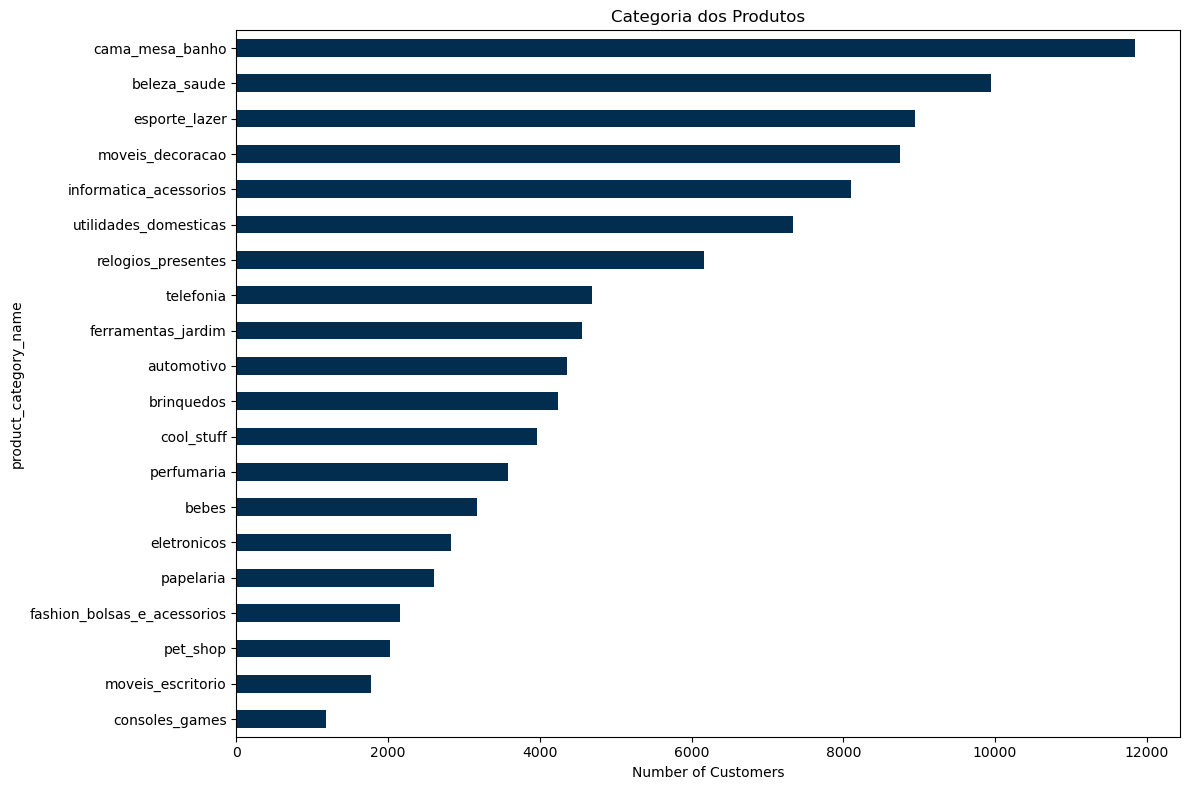

In [27]:
plt.figure(figsize=(12, 8))
df.product_category_name.value_counts().head(20).sort_values().plot(kind='barh', color='#032d4f')
plt.title("Categoria dos Produtos")
plt.xlabel("Number of Customers")
plt.tight_layout()
plt.show()

In [28]:
#Numéricas
 #payment_value – valor total pago

 #freight_value – valor do frete

 #price – preço dos produtos

 #product_weight_g – peso

 #product_length_cm, product_height_cm, product_width_cm – dimensões dos produtos
    
 # product_name_lenght e product_description_lenght

In [29]:
df.groupby(['payment_value']).size().sort_values(ascending=False).head(25)

payment_value
50.00     348
100.00    287
20.00     285
77.57     250
35.00     163
73.34     158
30.00     136
116.94    130
56.78     120
155.14    119
107.78    117
65.00     115
25.00     115
45.00     108
99.90     107
87.64     105
86.15     105
67.50     102
105.28    100
31.75      97
64.00      97
54.00      95
45.09      95
37.77      94
65.71      93
dtype: int64

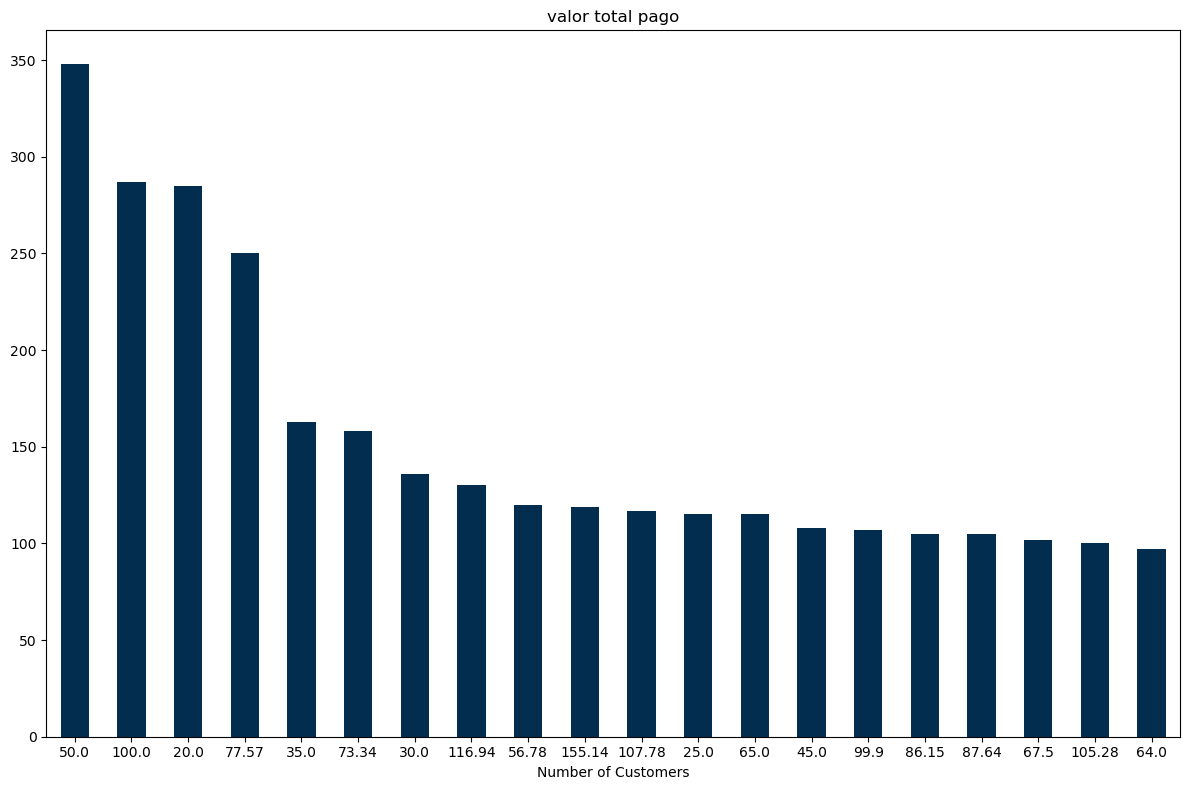

In [50]:
plt.figure(figsize=(12, 8))
df.payment_value.value_counts().head(20).plot(kind='bar', color='#032d4f')
plt.title("valor total pago")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
df.groupby(['freight_value']).size().sort_values(ascending=False).head(25)

freight_value
15.10    3824
7.78     2331
11.85    1989
14.10    1977
18.23    1622
7.39     1568
16.11    1202
15.23    1055
8.72      966
16.79     920
14.52     887
12.79     821
10.96     751
9.34      712
17.60     636
12.69     624
17.67     611
15.11     470
11.73     457
12.48     436
15.79     430
8.88      429
13.37     428
17.63     421
19.32     406
dtype: int64

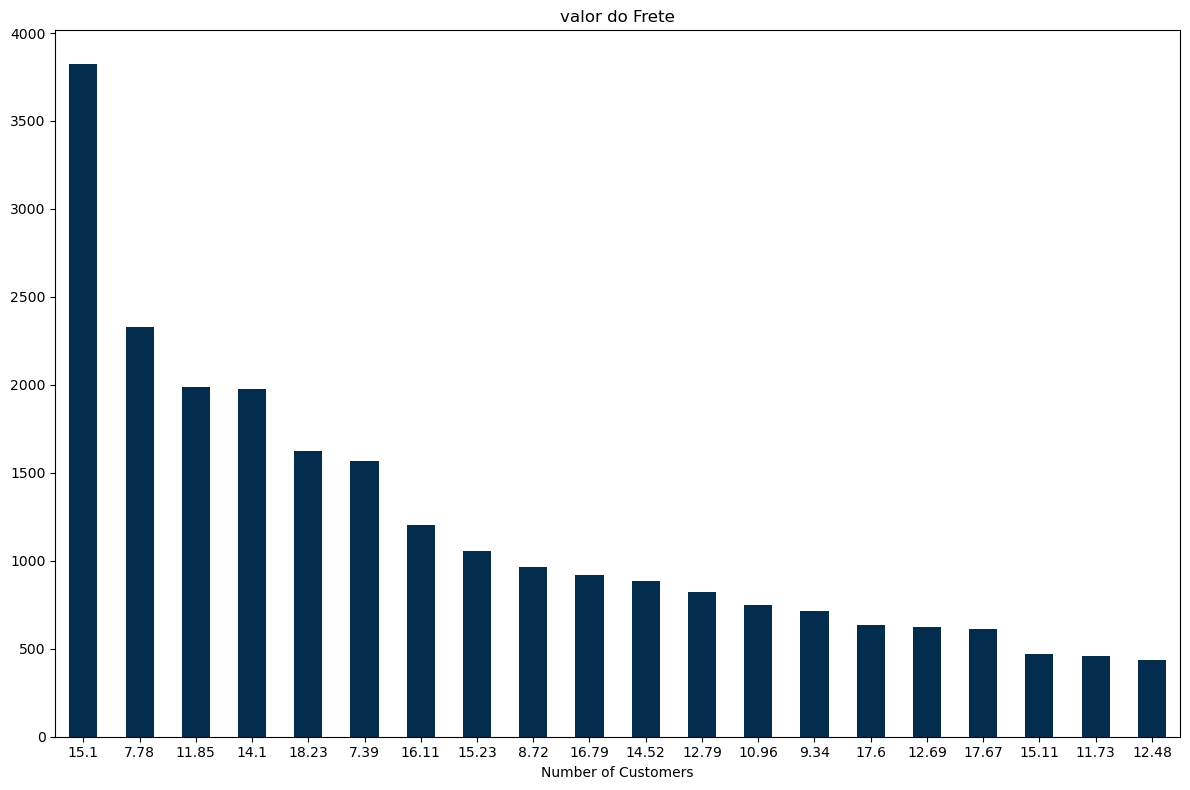

In [51]:
plt.figure(figsize=(12, 8))
df.freight_value.value_counts().head(20).plot(kind='bar', color='#032d4f')
plt.title("valor do Frete")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
df.groupby(['price']).size().sort_values(ascending=False).head(25)

price
59.90     2595
69.90     2105
49.90     2038
89.90     1619
99.90     1518
39.90     1381
29.90     1379
79.90     1271
19.90     1270
29.99     1216
49.00     1198
99.00     1006
149.90     895
109.90     821
119.90     788
99.99      750
24.90      713
35.00      704
39.99      699
49.99      691
129.90     677
34.90      674
89.99      670
79.00      659
56.99      650
dtype: int64

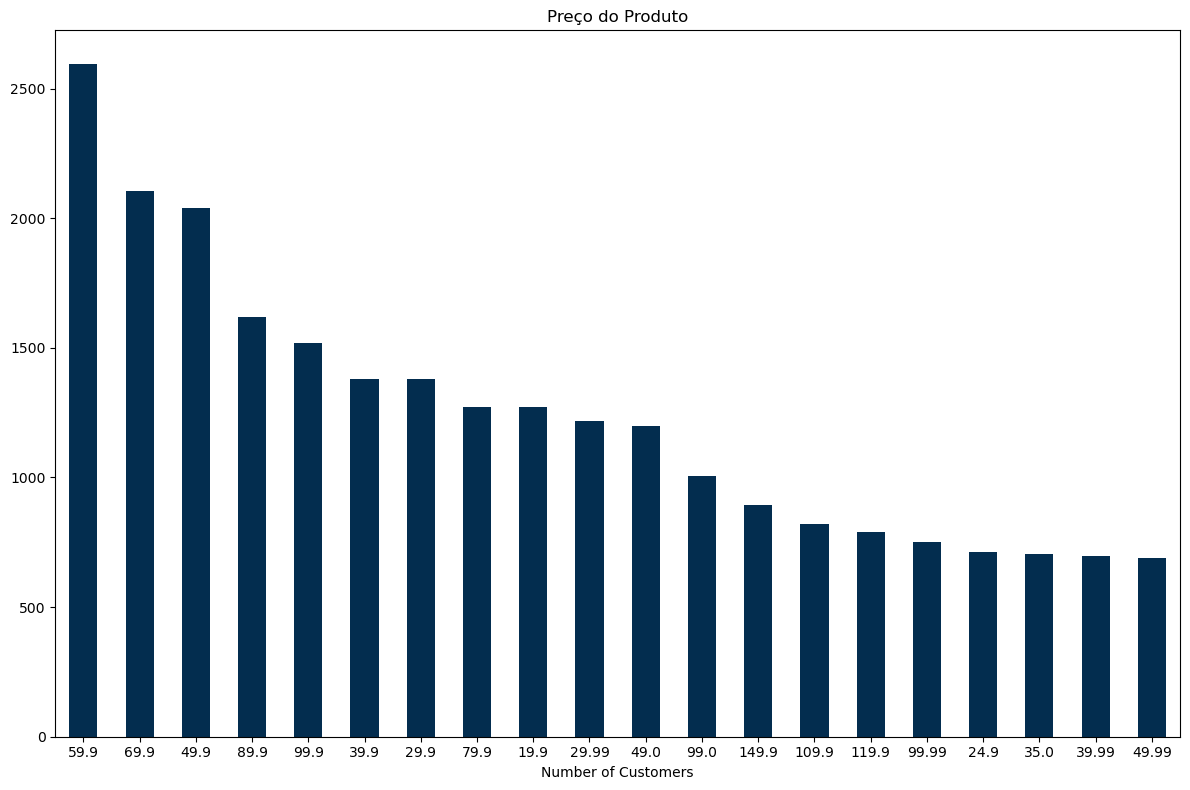

In [52]:
plt.figure(figsize=(12, 8))
df.price.value_counts().head(20).plot(kind='bar', color='#032d4f')
plt.title("Preço do Produto")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
df.groupby(['product_weight_g']).size().sort_values(ascending=False).head(25)

product_weight_g
200.0     7030
150.0     5365
250.0     4714
300.0     4398
400.0     3768
100.0     3649
350.0     3269
500.0     2831
600.0     2816
700.0     2118
800.0     1905
450.0     1891
550.0     1726
900.0     1509
1000.0    1451
1500.0    1373
1200.0    1331
850.0     1307
650.0     1269
1400.0    1146
750.0     1129
950.0     1119
1100.0    1090
1550.0    1058
1050.0     997
dtype: int64

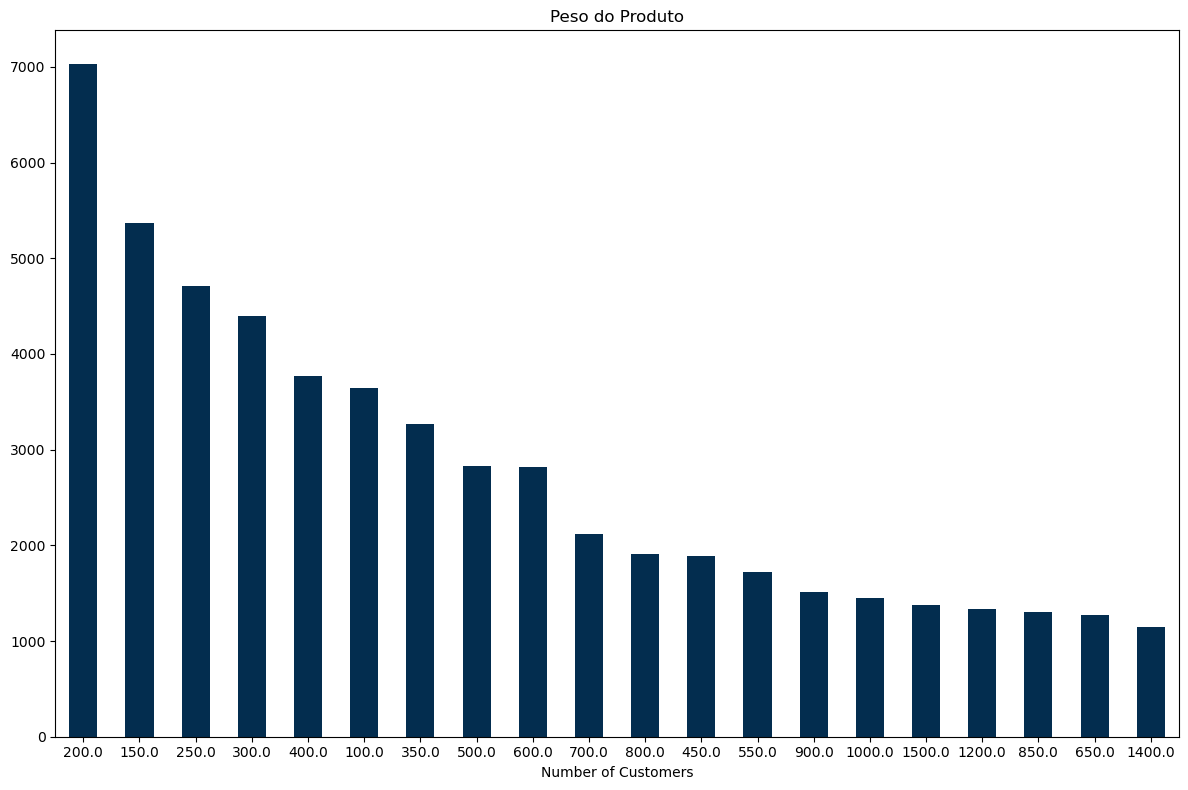

In [54]:
plt.figure(figsize=(12, 8))
df.product_weight_g.value_counts().head(20).plot(kind='bar', color='#032d4f')
plt.title("Peso do Produto")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

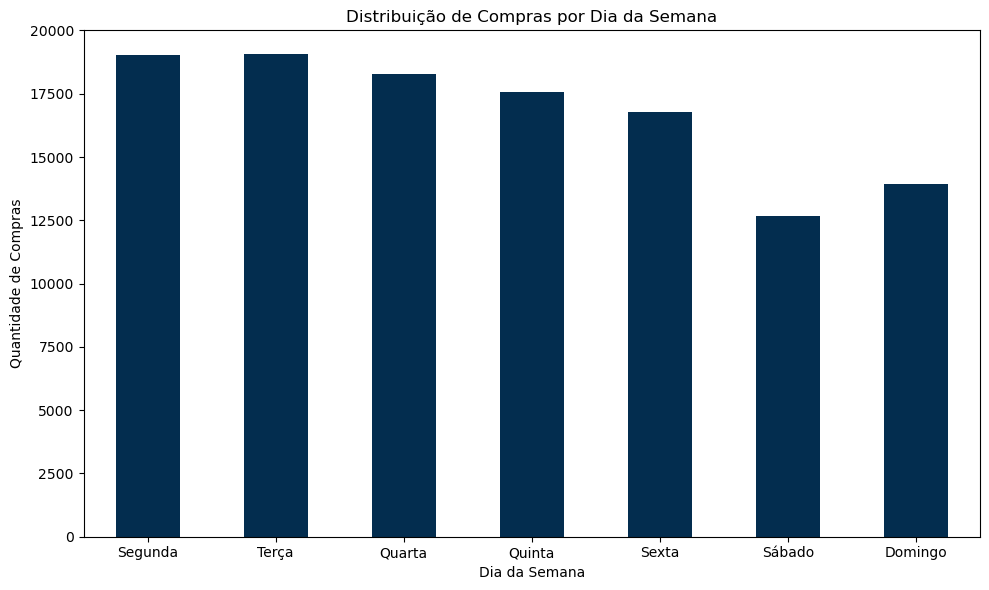

In [55]:
# Criar a coluna corretamente
df['purchase_dayofweek'] = pd.to_datetime(df['order_purchase_timestamp']).dt.dayofweek

# Criar uma ordem correta para os dias da semana
days_week = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
count_days = df['purchase_dayofweek'].value_counts().sort_index()

# Plotar
plt.figure(figsize=(10, 6))
count_days.plot(kind='bar', color='#032d4f')
plt.title("Distribuição de Compras por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade de Compras")
plt.xticks(ticks=range(7), labels=days_week, rotation=0)
plt.tight_layout()
plt.show()

In [37]:
#order_purchase_timestamp
# formato atual: ano, mês e dia
df['purchase_date'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extrai o mês da compra
df['month'] = df['purchase_date'].dt.month

df.groupby(['month']).size().sort_values(ascending=False).head(25)

month
8     12597
5     12585
7     12148
3     11692
6     11149
4     11043
2     10002
1      9534
11     9014
12     6522
10     5943
9      5100
dtype: int64

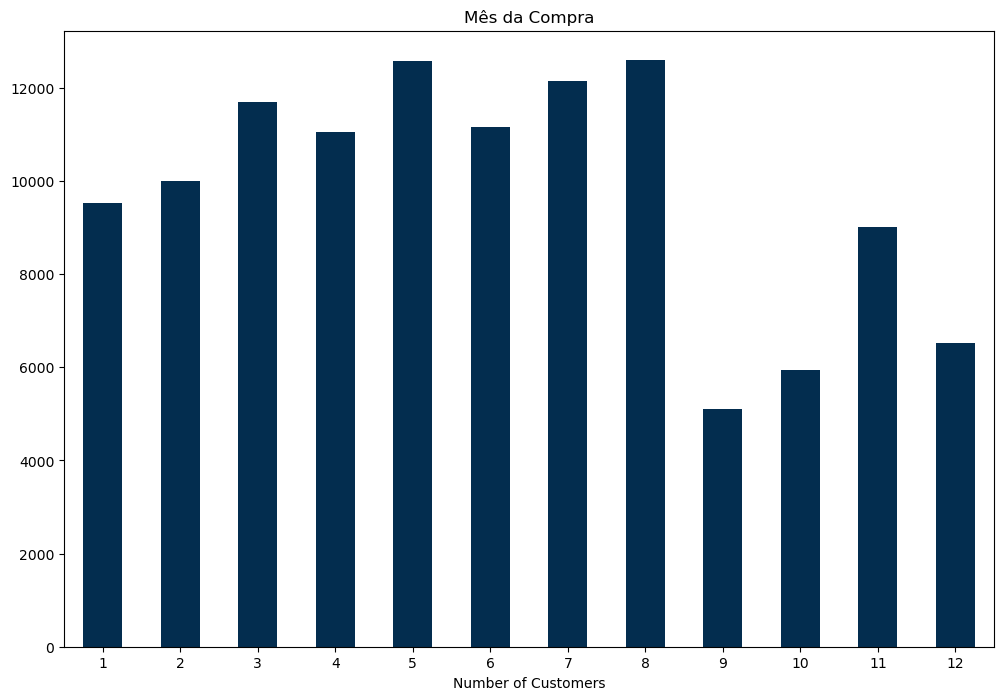

In [56]:
plt.figure(figsize=(12, 8))
df.month.value_counts().sort_values(ascending=False).sort_index(ascending=True).plot(kind='bar', color='#032d4f')
plt.title("Mês da Compra")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

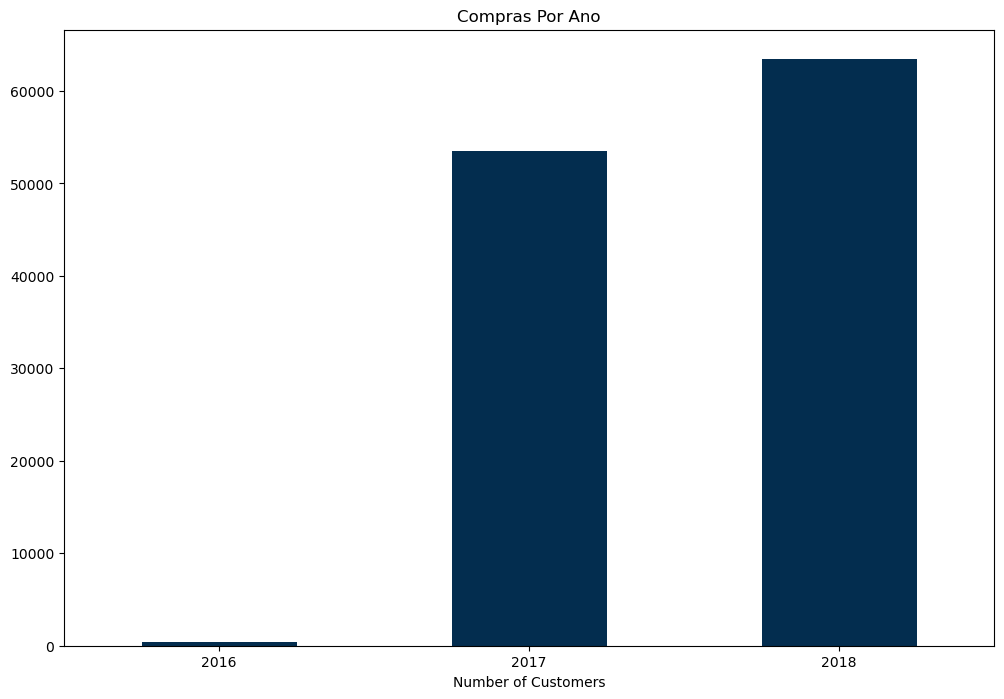

In [57]:
df['purchase_year'] = df['purchase_date'].dt.year
plt.figure(figsize=(12, 8))
df.purchase_year.value_counts().sort_index(ascending=True).plot(kind='bar', color='#032d4f')
plt.title("Compras Por Ano")
plt.xlabel("Number of Customers")
plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [ ]:
#analisar possiveis outliers

In [58]:
numeric_var = []
for i in df.columns[0:37].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numeric_var.append(i)
print(len(numeric_var))
numeric_var

15


['customer_zip_code_prefix',
 'review_score',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

<function matplotlib.pyplot.show(close=None, block=None)>

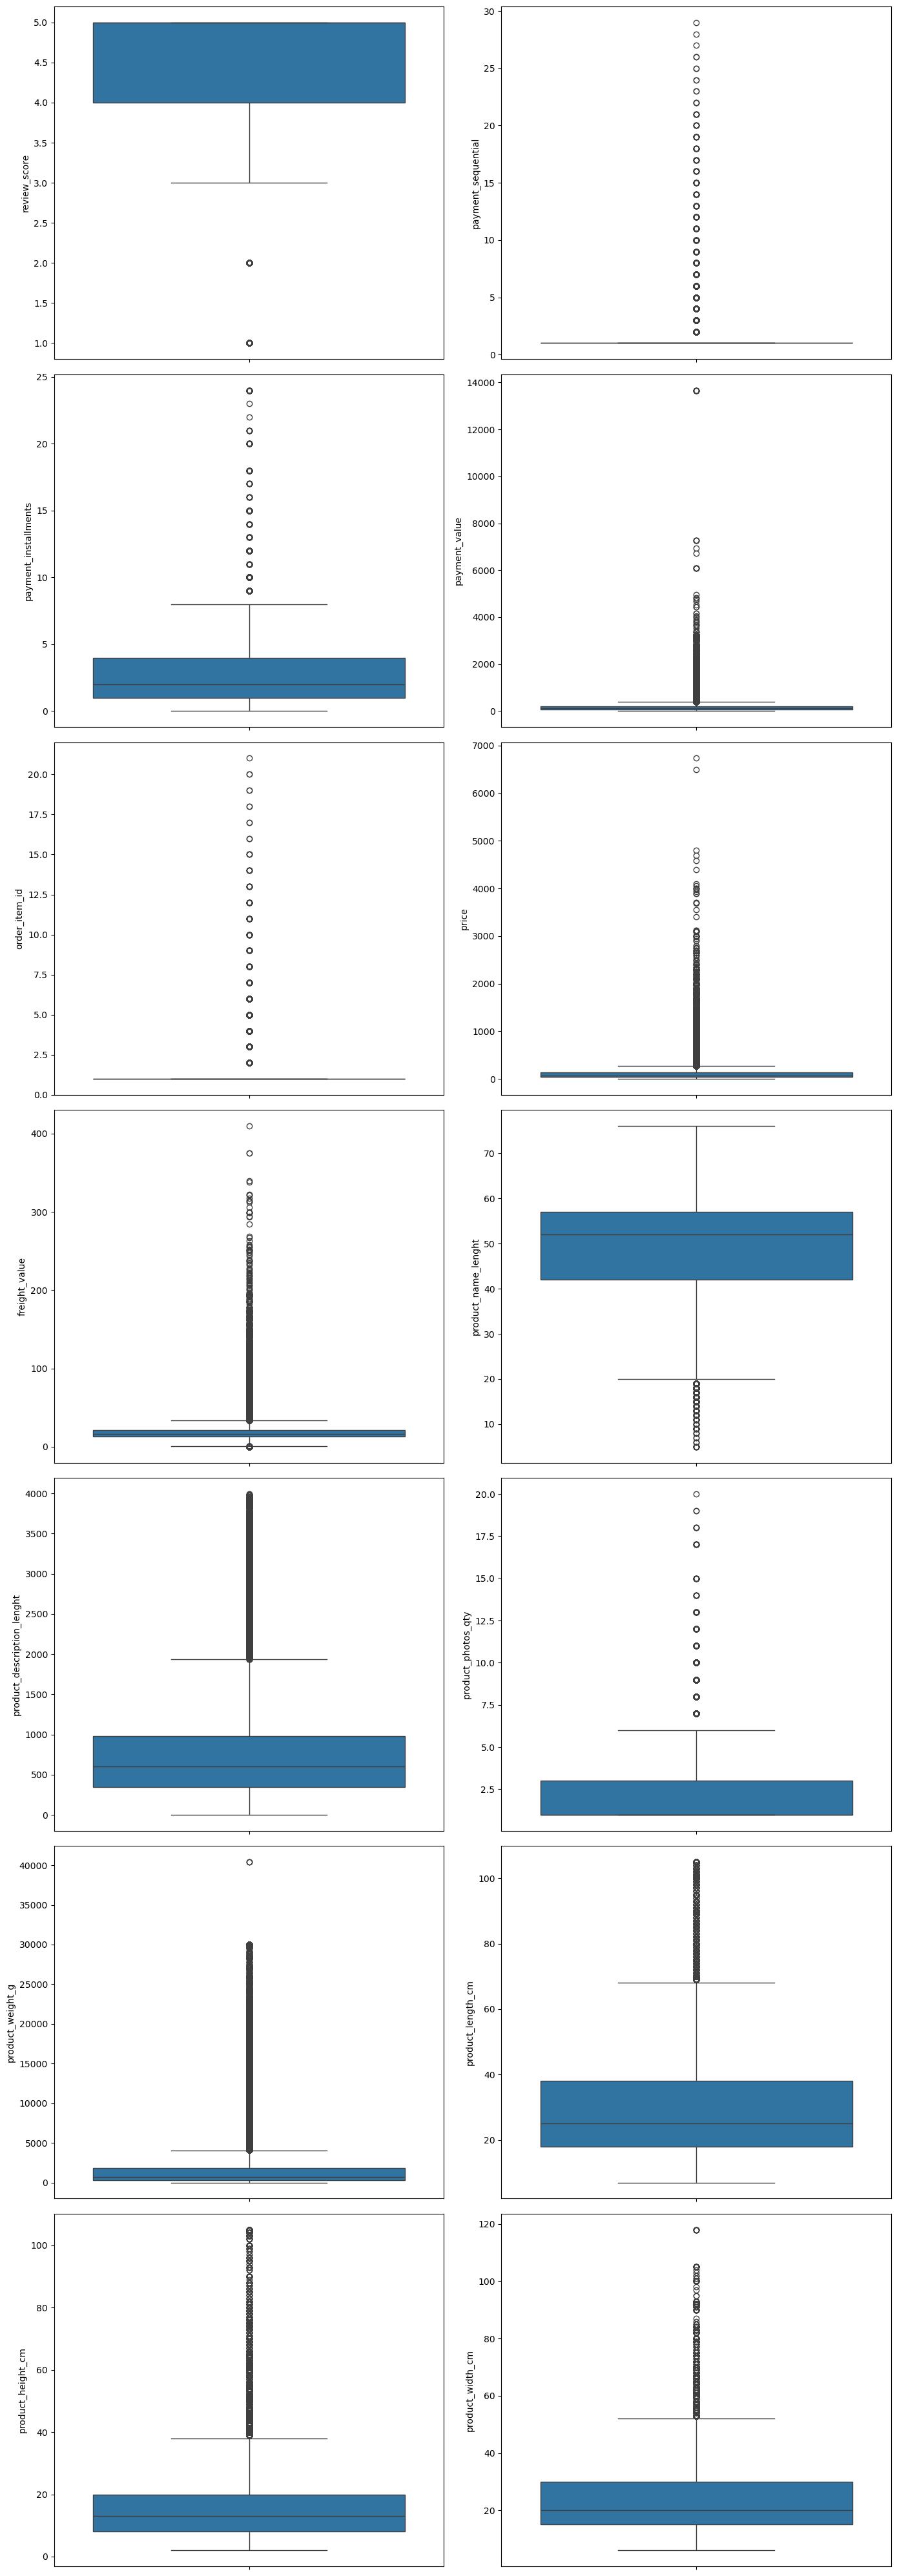

In [59]:
del numeric_var[0]

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2, figsize=(14, 40)) #8 linhas e 2 colunas
linha = 0
coluna = 0
for i in numeric_var:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 2:
        linha +=1
        coluna = 0
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

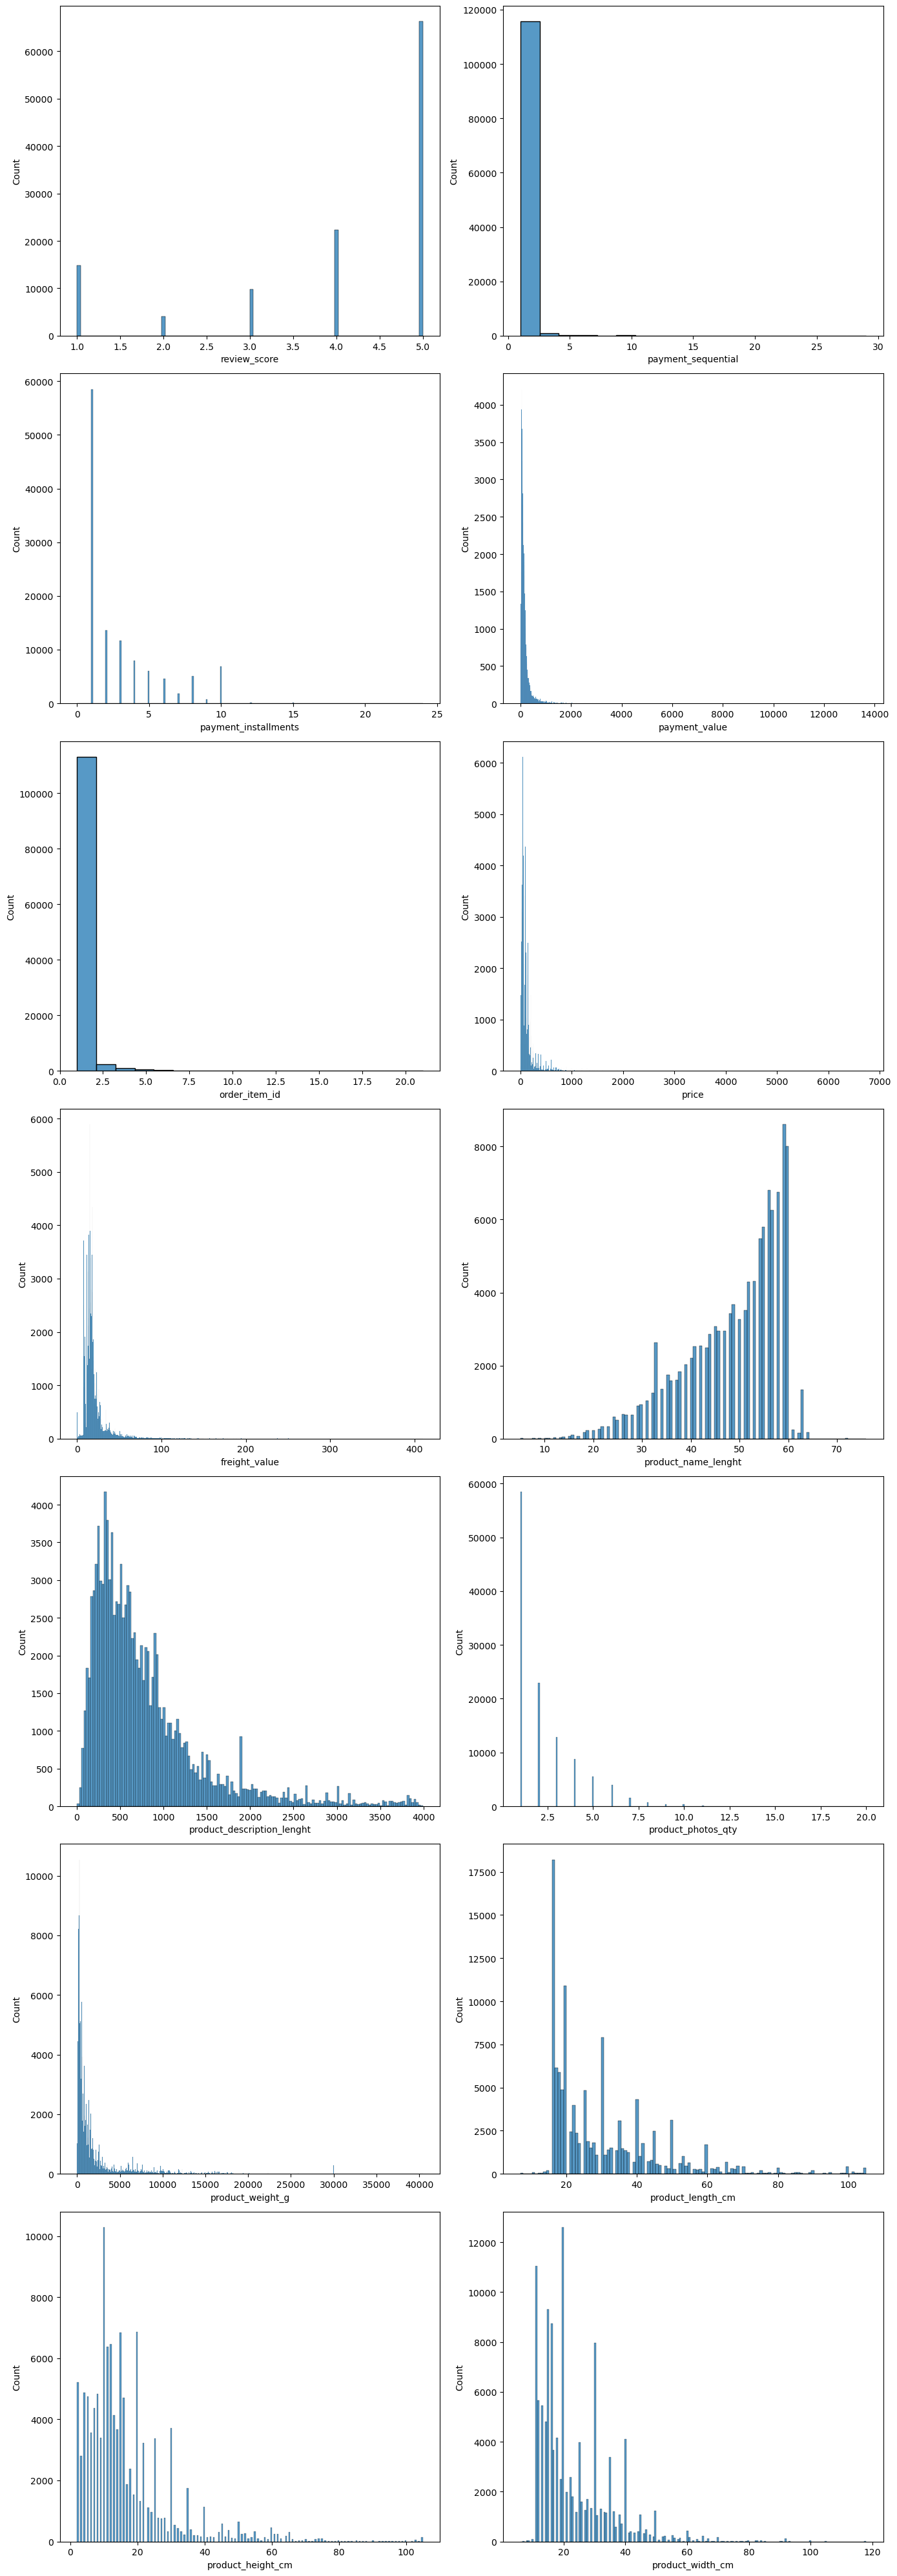

In [60]:
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2, figsize=(14, 40)) #8 linhas e 2 colunas
linha = 0
coluna = 0
for i in numeric_var:
    sns.histplot(data=df, x=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 2:
        linha +=1
        coluna = 0
plt.show

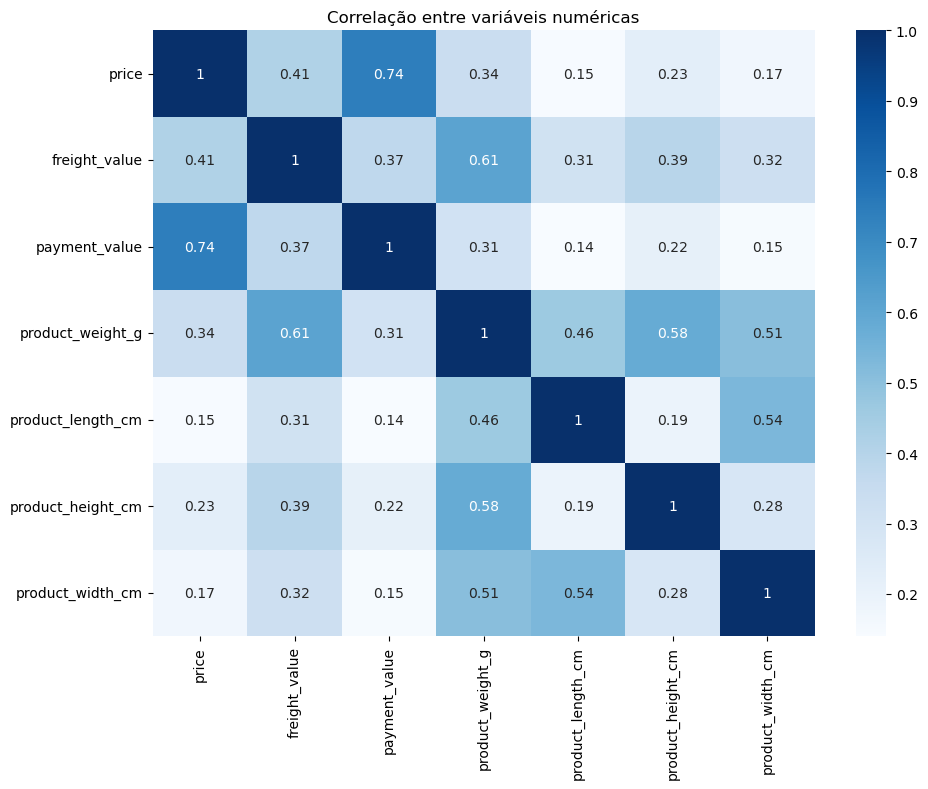

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['price', 'freight_value', 'payment_value', 'product_weight_g', 
                'product_length_cm', 'product_height_cm', 'product_width_cm']].corr(), annot=True, cmap='Blues')
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()